# Non-linear approach for the data

The linear model from before is not good enough. So, we use few other algorithms here that include regularized linear model (lasso, ridge) and non-linear model(SVR, random forrest etc.).

In [1]:
# import libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='Sheet3')
df = df.fillna(value=0)
array = df.values
X = array[:, 0:-4]
y = array[:, -1]

# preprocessing/scaling data/ standardization
X = preprocessing.minmax_scale(X)
y = preprocessing.minmax_scale(y)

In [4]:
# prepare models. here I used the model right away using the default parameter
regressor = []
# regressor.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)))
regressor.append(('LASS', Lasso(alpha=0.01)))
regressor.append(('RIDG', Ridge(fit_intercept=True, alpha=0.1)))
regressor.append(('GRB', GradientBoostingRegressor()))
regressor.append(('SVR', SVR(kernel='rbf')))
regressor.append(('KNN', KNeighborsRegressor()))
regressor.append(('DTR', DecisionTreeRegressor()))
regressor.append(('RFR', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []

# Calculate the r-squared for every algorithm (mean score of cross validated data)
for name, reg in regressor:
    kfold = KFold(n_splits=4, random_state=27)
    cv_results = cross_val_score(reg, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASS: -0.332030 (0.372190)
RIDG: -0.312712 (0.617231)
GRB: -0.259877 (0.098652)
SVR: -0.338959 (0.392111)
KNN: -0.846797 (0.937010)
DTR: -0.745450 (0.651247)
RFR: -0.341697 (0.163617)


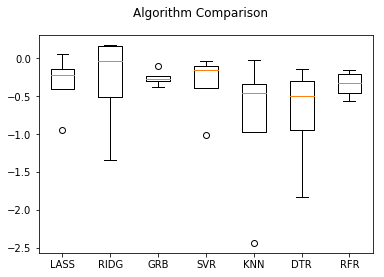

In [5]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


The models are still pretty bad. We might need to adjust a few things with the features and get more data.